### Importing required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
!pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Load the data
data = pd.read_excel(r"/content/CNG_sentiment.xlsx")
print(f"Dataset shape : {data.shape}")

Dataset shape : (612, 4)


In [ ]:
data.head()

,Sr.No.,Comments,Label,Feedback
0,1,Generations to come will benefit greatly from ...,1,Positive
1,2,This is better suited for a person of a differ...,1,Positive
2,3,Does a CNG engine get very hot at 45 degrees?,0,Neutral
3,4,"This bike may have a higher cost, but the comp...",1,Positive
4,5,Please tell us About Highest Speed of this bike,0,Neutral


In [ ]:
#Column names
print(f"Feature names : {data.columns.values}")

Feature names : ['Sr.No. ' 'Comments ' 'Label ' 'Feedback ']


There is one record with no 'verified_reviews' (null value)

In [ ]:
#We will drop the null record
data.dropna(inplace=True)

In [ ]:
print(f"Dataset shape after dropping null values : {data.shape}")

Dataset shape after dropping null values : (612, 4)


In [ ]:
# Strip any leading or trailing spaces from column names
data.columns = data.columns.str.strip()
data_cleaned = data.dropna()
print(f"Dataset shape after removing NaN rows: {data_cleaned.shape}")
print(data_cleaned.isnull().sum())

Dataset shape after removing NaN rows: (612, 4)
Sr.No.      0
Comments    0
Label       0
Feedback    0
dtype: int64


In [ ]:
data_cleaned.head()

,Sr.No.,Comments,Label,Feedback
0,1,Generations to come will benefit greatly from ...,1,Positive
1,2,This is better suited for a person of a differ...,1,Positive
2,3,Does a CNG engine get very hot at 45 degrees?,0,Neutral
3,4,"This bike may have a higher cost, but the comp...",1,Positive
4,5,Please tell us About Highest Speed of this bike,0,Neutral


In [ ]:
data_cleaned.dtypes

,0
Sr.No.,int64
Comments,object
Label,int64
Feedback,object


In [ ]:
len(data_cleaned)

612

Let's plot the above values in a pie chart


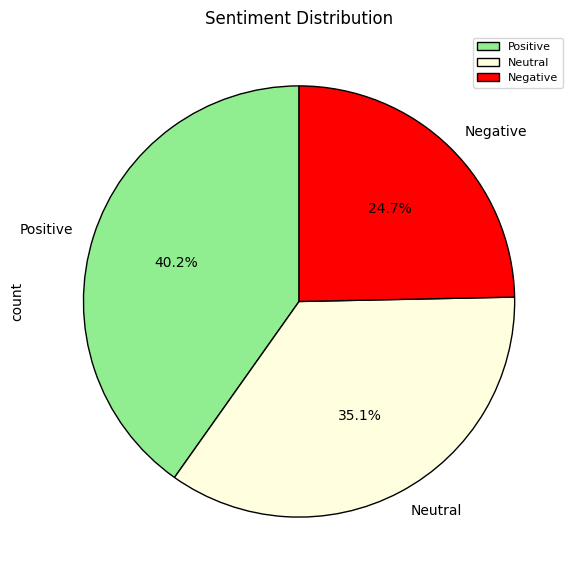

In [ ]:
feedback_counts = data_cleaned['Feedback'].value_counts()
plt.figure(figsize=(10, 7))
feedback_counts.plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'lightyellow', 'red'],
                          startangle=90, wedgeprops={'edgecolor': 'black'})
plt.gca().set_facecolor('white')
plt.title('Sentiment Distribution')
plt.legend(feedback_counts.index, fontsize='8')
plt.show()

In [ ]:
# separating the data and labels
X = data_cleaned['Comments'].values
Y1 = data_cleaned['Label'].values

In [ ]:
#print(X)

In [ ]:
nltk.download('punkt')
stemmer = PorterStemmer()
corpus = data_cleaned['Comments'].astype(str).tolist()
corpus_tokenized = [word_tokenize(comment.lower()) for comment in corpus]
corpus_stemmed = [' '.join([stemmer.stem(word) for word in comment]) for comment in corpus_tokenized]
print(corpus_stemmed[:5])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['gener to come will benefit greatli from thi', 'thi is better suit for a person of a differ height .', 'doe a cng engin get veri hot at 45 degre ?', 'thi bike may have a higher cost , but the compani can demonstr it commit to custom trust by ensur the highest safeti standard . by offer a compens of rs 1 crore in case of ani unlik accid , or by transpar share all cylind tests—includ variou temperatur test from 0° to 60° and load capac evaluations—th compani can build confid . with thi approach , the bike will gain widespread trust and becom one of the top-sel model .', 'pleas tell us about highest speed of thi bike']


In [ ]:
X= corpus_stemmed

In [ ]:
#X

In [ ]:
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in X]

In [ ]:
#tokenized_corpus

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid=SentimentIntensityAnalyzer()

In [ ]:
a= "Can I ride this bike 350km in a day?"
sid.polarity_scores(a)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [ ]:
sid.polarity_scores(data_cleaned['Comments'][0])

{'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound': 0.4588}

In [ ]:
data_cleaned['scores']=data_cleaned['Comments'].apply(lambda Comments:sid.polarity_scores(Comments))

In [ ]:
data_cleaned.head()

,Sr.No.,Comments,Label,Feedback,scores
0,1,Generations to come will benefit greatly from ...,1,Positive,"{'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound..."
1,2,This is better suited for a person of a differ...,1,Positive,"{'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'comp..."
2,3,Does a CNG engine get very hot at 45 degrees?,0,Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,4,"This bike may have a higher cost, but the comp...",1,Positive,"{'neg': 0.03, 'neu': 0.647, 'pos': 0.323, 'com..."
4,5,Please tell us About Highest Speed of this bike,0,Neutral,"{'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'comp..."


In [ ]:
data_cleaned['compound']=data_cleaned['scores'].apply(lambda score_dict:score_dict['compound'])

In [ ]:
data_cleaned.head(10)

,Sr.No.,Comments,Label,Feedback,scores,compound
0,1,Generations to come will benefit greatly from ...,1,Positive,"{'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound...",0.4588
1,2,This is better suited for a person of a differ...,1,Positive,"{'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'comp...",0.4404
2,3,Does a CNG engine get very hot at 45 degrees?,0,Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,4,"This bike may have a higher cost, but the comp...",1,Positive,"{'neg': 0.03, 'neu': 0.647, 'pos': 0.323, 'com...",0.9841
4,5,Please tell us About Highest Speed of this bike,0,Neutral,"{'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'comp...",0.3182
5,6,When will Mumbai be available?,0,Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
6,7,"Why is no one reviewing these bike riders, why...",0,Neutral,"{'neg': 0.149, 'neu': 0.851, 'pos': 0.0, 'comp...",-0.5994
7,8,How well does the cylinder withstand heat?,0,Neutral,"{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...",0.2732
8,9,Bajaj is commendable in spending on rnd to dev...,1,Positive,"{'neg': 0.0, 'neu': 0.766, 'pos': 0.234, 'comp...",0.7003
9,10,"With my brother riding the bike, we can be con...",-1,Negative,"{'neg': 0.091, 'neu': 0.661, 'pos': 0.248, 'co...",0.5859


In [ ]:
data_cleaned['comp_score'] = data_cleaned['compound'].apply(lambda c: 'positive' if c > 0 else ('negative' if c < 0 else 'neutral'))
data_cleaned.head(7)

,Sr.No.,Comments,Label,Feedback,scores,compound,comp_score
0,1,Generations to come will benefit greatly from ...,1,Positive,"{'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound...",0.4588,positive
1,2,This is better suited for a person of a differ...,1,Positive,"{'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'comp...",0.4404,positive
2,3,Does a CNG engine get very hot at 45 degrees?,0,Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
3,4,"This bike may have a higher cost, but the comp...",1,Positive,"{'neg': 0.03, 'neu': 0.647, 'pos': 0.323, 'com...",0.9841,positive
4,5,Please tell us About Highest Speed of this bike,0,Neutral,"{'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'comp...",0.3182,positive
5,6,When will Mumbai be available?,0,Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
6,7,"Why is no one reviewing these bike riders, why...",0,Neutral,"{'neg': 0.149, 'neu': 0.851, 'pos': 0.0, 'comp...",-0.5994,negative


In [ ]:
# Extract y_actual and y_predict
y_actual = data_cleaned['Feedback']
y_predict = data_cleaned['comp_score']
print("y_actual:")
print(y_actual)
print("y_predict:")
print(y_predict)

y_actual:
0      Positive
1      Positive
2       Neutral
3      Positive
4       Neutral
         ...   
607    Negative
608     Neutral
609     Neutral
610     Neutral
611     Neutral
Name: Feedback, Length: 612, dtype: object
y_predict:
0      positive
1      positive
2       neutral
3      positive
4      positive
         ...   
607    positive
608    positive
609     neutral
610     neutral
611    negative
Name: comp_score, Length: 612, dtype: object


In [ ]:
y_predict = data_cleaned['comp_score']

# Define the mapping
mapping = {
    'positive': 1,
    'neutral': 0,
    'negative': -1
}
y_predict_numeric = y_predict.map(mapping)
print("Converted y_predict:")
print(y_predict_numeric)

Converted y_predict:
0      1
1      1
2      0
3      1
4      1
      ..
607    1
608    1
609    0
610    0
611   -1
Name: comp_score, Length: 612, dtype: int64


Confusion Matrix:
[[207  33   6]
 [ 68 121  26]
 [ 34  54  63]]


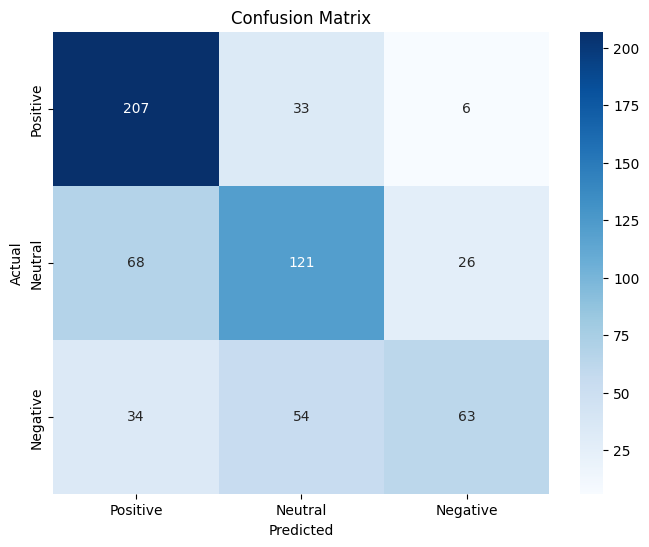


Classification Report:
              precision    recall  f1-score   support

    Positive       0.66      0.42      0.51       151
     Neutral       0.58      0.56      0.57       215
    Negative       0.67      0.84      0.75       246

    accuracy                           0.64       612
   macro avg       0.64      0.61      0.61       612
weighted avg       0.64      0.64      0.63       612



In [ ]:
data_cleaned['Feedback'] = data_cleaned['Feedback'].str.lower()
data_cleaned['comp_score'] = data_cleaned['comp_score'].str.lower()
y_actual = data_cleaned['Feedback']
y_predict = data_cleaned['comp_score']
cm = confusion_matrix(y_actual, y_predict, labels=['positive', 'neutral', 'negative'])
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Neutral', 'Negative'], yticklabels=['Positive', 'Neutral', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print("\nClassification Report:")
print(classification_report(y_actual, y_predict, target_names=['Positive', 'Neutral', 'Negative']))

In [ ]:
# 2nd part

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_actual, y_predict)

In [ ]:
# Print classification report for metrics
print("\nClassification Report:")
print(classification_report(y_actual, y_predict, target_names=['Positive', 'Neutral', 'Negative']))
print(f"\nAccuracy: {accuracy:.2f}")


Classification Report:
              precision    recall  f1-score   support

    Positive       0.66      0.42      0.51       151
     Neutral       0.58      0.56      0.57       215
    Negative       0.67      0.84      0.75       246

    accuracy                           0.64       612
   macro avg       0.64      0.61      0.61       612
weighted avg       0.64      0.64      0.63       612


Accuracy: 0.64


In [ ]:
accuracy*100

63.888888888888886

In [ ]:
# Print classification report for  metrics
print("\nClassification Report:")
print(classification_report(y_actual, y_predict, target_names=['Positive', 'Neutral', 'Negative']))
print('my bike is good')


Classification Report:
              precision    recall  f1-score   support

    Positive       0.66      0.42      0.51       151
     Neutral       0.58      0.56      0.57       215
    Negative       0.67      0.84      0.75       246

    accuracy                           0.64       612
   macro avg       0.64      0.61      0.61       612
weighted avg       0.64      0.64      0.63       612

my bike is good


In [ ]:
 #new DataFrame df1 with only the 'Stemmed_Comments' column
df1 = data_cleaned[['Comments']].copy()
df1.head(7)

,Comments
0,Generations to come will benefit greatly from ...
1,This is better suited for a person of a differ...
2,Does a CNG engine get very hot at 45 degrees?
3,"This bike may have a higher cost, but the comp..."
4,Please tell us About Highest Speed of this bike
5,When will Mumbai be available?
6,"Why is no one reviewing these bike riders, why..."


In [ ]:
df1.isnull().sum()

,0
Comments,0


In [ ]:
pip install sentence_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 7.6 MB/s eta 0:00:00


In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')
sentences = df1['Comments'].tolist()
sentence_embeddings = model.encode(sentences)
print(sentence_embeddings)

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

[[-0.03211955  0.06426828  0.01131997 ...  0.01532041  0.06253861
   0.00071358]
 [ 0.01780118  0.07244659  0.00414771 ...  0.01694879 -0.06257771
   0.04108594]
 [-0.05789516  0.01128117  0.00239315 ... -0.00510988 -0.01356377
  -0.04257613]
 ...
 [ 0.05150392  0.0479958  -0.0166502  ... -0.0891536   0.00420992
  -0.09005844]
 [-0.04457512  0.05337559  0.00780412 ... -0.06021465 -0.02616871
   0.00526588]
 [-0.00794564  0.0889452  -0.00036116 ... -0.05583659 -0.03471287
  -0.07365938]]


In [ ]:
X= sentence_embeddings
Y = data_cleaned['Label']

In [ ]:
X

array([[-0.03211955,  0.06426828,  0.01131997, ...,  0.01532041,
         0.06253861,  0.00071358],
       [ 0.01780118,  0.07244659,  0.00414771, ...,  0.01694879,
        -0.06257771,  0.04108594],
       [-0.05789516,  0.01128117,  0.00239315, ..., -0.00510988,
        -0.01356377, -0.04257613],
       ...,
       [ 0.05150392,  0.0479958 , -0.0166502 , ..., -0.0891536 ,
         0.00420992, -0.09005844],
       [-0.04457512,  0.05337559,  0.00780412, ..., -0.06021465,
        -0.02616871,  0.00526588],
       [-0.00794564,  0.0889452 , -0.00036116, ..., -0.05583659,
        -0.03471287, -0.07365938]], dtype=float32)

In [ ]:
data_cleaned['y1'] = data_cleaned['Label'].apply(lambda x: 0 if x == -1 else (1 if x == 0 else 2))
print(data_cleaned[['Label', 'y1']].head(8))

   Label  y1
0      1   2
1      1   2
2      0   1
3      1   2
4      0   1
5      0   1
6      0   1
7      0   1


In [ ]:
# Convert 'y1' column to a NumPy array
y1_array = data_cleaned['y1'].to_numpy()
print(y1_array)

[2 2 1 2 1 1 1 1 2 0 0 2 0 1 0 1 2 1 2 1 2 2 0 2 1 1 0 2 1 1 1 2 2 2 2 2 2
 2 2 1 2 2 1 0 1 1 1 2 0 2 1 2 2 2 2 0 2 1 0 0 2 2 0 0 2 2 2 0 0 2 1 2 0 1
 2 2 0 2 2 2 1 2 0 1 0 2 0 2 2 0 0 2 0 0 1 1 0 0 1 2 0 2 2 2 1 2 2 2 2 0 1
 1 2 0 2 2 0 1 0 0 2 0 2 2 2 1 2 2 2 1 0 0 2 1 2 1 2 1 1 1 2 2 0 2 2 0 0 0
 1 2 0 2 0 2 2 2 0 1 2 2 2 1 2 0 2 2 0 0 1 0 2 0 2 2 2 2 0 0 0 2 0 1 2 2 0
 2 2 2 2 1 1 1 1 2 2 0 2 1 1 2 2 2 2 2 1 0 1 0 2 0 2 2 1 2 2 2 1 2 0 0 2 2
 2 0 2 1 1 0 0 0 1 1 2 0 2 2 2 0 1 1 2 0 2 2 1 1 2 2 0 2 1 0 2 0 2 1 2 0 2
 2 1 1 0 0 0 0 1 2 2 1 1 0 2 1 1 2 1 2 0 2 1 2 0 1 2 0 0 1 2 2 2 2 2 0 0 0
 0 2 1 1 1 1 2 2 2 1 2 0 2 2 1 1 2 0 2 0 2 0 2 1 2 1 2 2 2 1 1 1 0 2 1 0 2
 2 2 1 2 0 0 2 1 1 0 2 0 1 0 2 1 2 0 0 1 2 0 1 1 1 1 0 0 1 0 1 0 1 1 2 2 2
 0 0 1 0 1 0 1 2 2 0 2 2 1 1 0 2 2 1 1 1 2 2 0 0 1 1 2 1 0 2 1 0 1 1 1 2 1
 0 1 1 1 1 0 2 2 1 2 0 2 2 2 2 2 2 0 1 1 1 2 2 2 1 2 0 2 1 2 2 2 2 2 0 2 2
 2 2 2 2 2 2 2 2 2 2 1 1 2 2 0 0 0 2 1 2 0 0 0 2 1 1 0 0 1 1 1 1 2 0 0 1 1
 2 0 2 0 1 2 0 0 2 0 1 0 

In [ ]:
Y1= y1_array

In [ ]:
Y1

array([2, 2, 1, 2, 1, 1, 1, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 1, 2, 2,
       0, 2, 1, 1, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 0,
       1, 1, 1, 2, 0, 2, 1, 2, 2, 2, 2, 0, 2, 1, 0, 0, 2, 2, 0, 0, 2, 2,
       2, 0, 0, 2, 1, 2, 0, 1, 2, 2, 0, 2, 2, 2, 1, 2, 0, 1, 0, 2, 0, 2,
       2, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0,
       1, 1, 2, 0, 2, 2, 0, 1, 0, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 0, 0,
       2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 0, 2,
       2, 2, 0, 1, 2, 2, 2, 1, 2, 0, 2, 2, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2,
       0, 0, 0, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 0, 2, 1,
       1, 2, 2, 2, 2, 2, 1, 0, 1, 0, 2, 0, 2, 2, 1, 2, 2, 2, 1, 2, 0, 0,
       2, 2, 2, 0, 2, 1, 1, 0, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 1, 1, 2, 0,
       2, 2, 1, 1, 2, 2, 0, 2, 1, 0, 2, 0, 2, 1, 2, 0, 2, 2, 1, 1, 0, 0,
       0, 0, 1, 2, 2, 1, 1, 0, 2, 1, 1, 2, 1, 2, 0, 2, 1, 2, 0, 1, 2, 0,
       0, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 1, 1, 1,

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y1, test_size=0.2, random_state=42)

In [ ]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (489, 384)
Size of y_train: (489,)
Size of x_test: (123, 384)
Size of y_test: (123,)


In [ ]:
y_test

array([2, 0, 0, 1, 0, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 0, 1, 1, 0,
       2, 0, 0, 1, 1, 0, 1, 1, 1, 2, 2, 2, 1, 0, 2, 1, 1, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 2, 1, 2, 1, 0, 0, 1, 0, 2, 1, 1, 2, 1, 2, 1, 2, 2,
       2, 0, 2, 1, 0, 1, 0, 1, 0, 2, 2, 1, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0,
       1, 0, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 2, 0, 2, 1, 1, 0, 2, 2, 0, 1,
       0, 2, 2, 1, 1, 0, 2, 1, 0, 2, 0, 2, 2])

In [ ]:
x_train

array([[ 0.01519523,  0.0195043 ,  0.01083572, ..., -0.04540341,
         0.02399365, -0.02271621],
       [ 0.04297115,  0.10439635, -0.02313202, ..., -0.07922626,
        -0.0526609 , -0.00438012],
       [-0.04178359,  0.08114354, -0.08054967, ..., -0.06538651,
         0.04057881, -0.0047263 ],
       ...,
       [ 0.08882236,  0.04215243, -0.06453789, ...,  0.01428905,
         0.03710631, -0.03124924],
       [-0.08514961,  0.13963164, -0.06444988, ..., -0.01891973,
         0.03597856, -0.06218018],
       [-0.01618497,  0.15122245,  0.00136882, ..., -0.06825524,
         0.02733115,  0.01087671]], dtype=float32)

In [ ]:
y_train

array([1, 1, 2, 2, 2, 0, 0, 2, 1, 2, 0, 1, 1, 2, 0, 2, 0, 2, 2, 0, 1, 2,
       2, 2, 0, 2, 0, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 2, 0, 1, 2, 0, 0,
       1, 0, 0, 2, 0, 2, 1, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 0, 2, 0, 1, 0,
       2, 2, 0, 1, 2, 2, 1, 0, 1, 1, 0, 2, 1, 2, 0, 1, 2, 1, 2, 1, 2, 2,
       2, 1, 2, 1, 0, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 0, 1, 2,
       0, 2, 1, 0, 0, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 0,
       2, 2, 2, 1, 0, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 0, 2, 2,
       1, 1, 1, 1, 2, 2, 2, 0, 1, 2, 2, 2, 2, 1, 2, 2, 1, 0, 2, 0, 1, 0,
       2, 1, 0, 0, 2, 2, 1, 2, 1, 2, 1, 2, 0, 1, 1, 2, 2, 2, 2, 0, 1, 0,
       1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 2, 2, 1, 2, 1, 0, 2,
       2, 0, 1, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 0, 1, 0, 1, 0, 2, 1,
       0, 2, 1, 1, 1, 2, 1, 0, 2, 1, 1, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 0, 1, 1, 2, 1, 0, 0, 2, 0, 1, 2, 2, 1, 0, 0, 0, 2, 2,
       1, 0, 2, 1, 0, 2, 2, 0, 2, 2, 0, 2, 2, 1, 0,

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 63.41%


In [ ]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[13 10  7]
 [ 7 32 10]
 [ 3  8 33]]


              precision    recall  f1-score   support

           0       0.57      0.43      0.49        30
           1       0.64      0.65      0.65        49
           2       0.66      0.75      0.70        44

    accuracy                           0.63       123
   macro avg       0.62      0.61      0.61       123
weighted avg       0.63      0.63      0.63       123



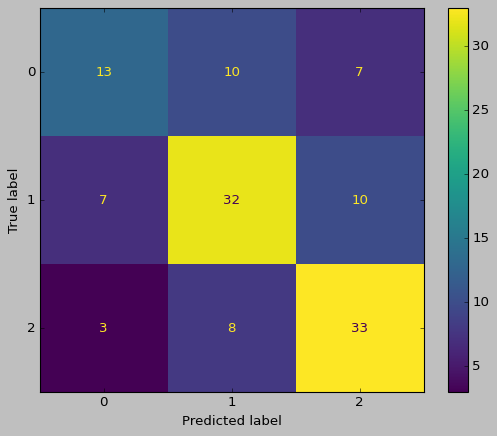

In [ ]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.show()

In [ ]:
# XGBoost
xgboost_model = xgb.XGBClassifier()
xgboost_model.fit(x_train, y_train)
xgboost_pred = xgboost_model.predict(x_test)
xgboost_acc = accuracy_score(xgboost_pred, y_test)
print("XGBoost Test accuracy: {:.2f}%".format(xgboost_acc * 100))

XGBoost Test accuracy: 68.29%


In [ ]:
# Set up the parameter grid to tune
param_grid = {
    'n_estimators': [100],
    'learning_rate': [0.1],
    'max_depth': [3],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
}
grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid,
                           cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)
best_xgboost_model = grid_search.best_estimator_
xgboost_pred = best_xgboost_model.predict(x_test)
xgboost_acc = accuracy_score(xgboost_pred, y_test)
print("Best Parameters:", grid_search.best_params_)
print("XGBoost Test accuracy after tuning: {:.2f}%".format(xgboost_acc * 100))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
XGBoost Test accuracy after tuning: 69.11%


In [ ]:
xgboost_model = XGBClassifier()
xgboost_model.fit(x_train, y_train)
xgboost_pred = xgboost_model.predict(x_test)
xgboost_acc = accuracy_score(xgboost_pred, y_test)
print("XGBoost Test accuracy: {:.2f}%".format(xgboost_acc * 100))

XGBoost Test accuracy: 68.29%


In [ ]:
print(confusion_matrix(y_test, xgboost_pred))
print("\n")
print(classification_report(y_test, xgboost_pred))

[[18  5  7]
 [ 3 35 11]
 [ 6  7 31]]


              precision    recall  f1-score   support

           0       0.67      0.60      0.63        30
           1       0.74      0.71      0.73        49
           2       0.63      0.70      0.67        44

    accuracy                           0.68       123
   macro avg       0.68      0.67      0.68       123
weighted avg       0.69      0.68      0.68       123



In [ ]:
# XGBoost classifier
xgboost_model = xgb.XGBClassifier()
random_search = RandomizedSearchCV(estimator=xgboost_model,
                                   param_distributions=param_grid,
                                   n_iter=10,
                                   scoring='accuracy',
                                   cv=3,
                                   verbose=1,
                                   n_jobs=-1,
                                   random_state=42)
random_search.fit(x_train, y_train)
best_xgboost_model = random_search.best_estimator_
xgboost_pred = best_xgboost_model.predict(x_test)
xgboost_acc = accuracy_score(y_test, xgboost_pred)
print("Best Parameters:", random_search.best_params_)
print("XGBoost Test accuracy after tuning: {:.2f}%".format(xgboost_acc * 100))
print(confusion_matrix(y_test, xgboost_pred))
print("\n")
print(classification_report(y_test, xgboost_pred))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
XGBoost Test accuracy after tuning: 69.11%
[[14  7  9]
 [ 2 39  8]
 [ 6  6 32]]


              precision    recall  f1-score   support

           0       0.64      0.47      0.54        30
           1       0.75      0.80      0.77        49
           2       0.65      0.73      0.69        44

    accuracy                           0.69       123
   macro avg       0.68      0.66      0.67       123
weighted avg       0.69      0.69      0.69       123



In [ ]:
print(confusion_matrix(y_test, xgboost_pred))
print("\n")
print(classification_report(y_test, xgboost_pred))

[[14  7  9]
 [ 2 39  8]
 [ 6  6 32]]


              precision    recall  f1-score   support

           0       0.64      0.47      0.54        30
           1       0.75      0.80      0.77        49
           2       0.65      0.73      0.69        44

    accuracy                           0.69       123
   macro avg       0.68      0.66      0.67       123
weighted avg       0.69      0.69      0.69       123



In [ ]:
pip install tensorflow

In [ ]:
# Initialize the ANN model
ann_model = Sequential()
ann_model.add(Dense(units=64, activation='relu', input_dim=x_train.shape[1]))
ann_model.add(Dense(units=32, activation='relu'))
ann_model.add(Dense(units=3, activation='softmax'))
ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ann_model.fit(x_train, y_train, epochs=30, batch_size=16, verbose=1)
y_pred_prob = ann_model.predict(x_test)
y_pred = y_pred_prob.argmax(axis=1)
ann_acc = accuracy_score(y_test, y_pred)
print("ANN Test accuracy: {:.2f}%".format(ann_acc * 100))

Epoch 1/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.4415 - loss: 1.0839
Epoch 2/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5530 - loss: 0.9778
Epoch 3/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6783 - loss: 0.8119
Epoch 4/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7687 - loss: 0.6875
Epoch 5/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8047 - loss: 0.5876
Epoch 6/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8581 - loss: 0.4761
Epoch 7/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8732 - loss: 0.4165
Epoch 8/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8786 - loss: 0.3533
Epoch 9/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9238 - loss: 0.2794
Epoch 10/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9024 - loss: 0.3131
Epoch 11/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9529 - loss: 0.2239
Epoch 12/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9449 - l

In [ ]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[19  6  5]
 [ 6 30 13]
 [ 6  5 33]]


              precision    recall  f1-score   support

           0       0.61      0.63      0.62        30
           1       0.73      0.61      0.67        49
           2       0.65      0.75      0.69        44

    accuracy                           0.67       123
   macro avg       0.66      0.67      0.66       123
weighted avg       0.67      0.67      0.67       123



In [ ]:
ann_model = Sequential()
ann_model.add(Dense(units=256, activation='relu', input_dim=x_train.shape[1]))
ann_model.add(Dense(units=128, activation='relu'))
ann_model.add(Dense(units=64, activation='relu'))
ann_model.add(Dense(units=3, activation='softmax'))
optimizer = Adam(learning_rate=0.0005)
ann_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ann_model.fit(x_train, y_train, epochs=30, batch_size=64, verbose=1)
y_pred_prob = ann_model.predict(x_test)
y_pred = y_pred_prob.argmax(axis=1)
ann_acc = accuracy_score(y_test, y_pred)
print("Tuned ANN Test accuracy: {:.2f}%".format(ann_acc * 100))


Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 268ms/step - accuracy: 0.3871 - loss: 1.0934
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6124 - loss: 1.0535
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5966 - loss: 0.9998 
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5998 - loss: 0.9375  
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6507 - loss: 0.8463  
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6824 - loss: 0.7603  
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7674 - loss: 0.6599  
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7817 - loss: 0.5839  
Epoch 9/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8391 - loss: 0.5168 
Epoch 10/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8491 - loss: 0.4544  
Epoch 11/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8658 - loss: 0.3903 
Epoch 12/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9081 - loss: 0.3

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [ ]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 69.92%


In [ ]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[19  7  4]
 [ 6 33 10]
 [ 4  6 34]]


              precision    recall  f1-score   support

           0       0.66      0.63      0.64        30
           1       0.72      0.67      0.69        49
           2       0.71      0.77      0.74        44

    accuracy                           0.70       123
   macro avg       0.69      0.69      0.69       123
weighted avg       0.70      0.70      0.70       123



In [ ]:
#SVM
svm_model = SVC()
svm_model.fit(x_train, y_train)
svm_pred = svm_model.predict(x_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"SVM Accuracy: {svm_accuracy:.2f}")

SVM Accuracy: 0.66


In [ ]:
# Knn
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)
knn_pred = knn_model.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print(f"KNN Accuracy: {knn_accuracy:.2f}")

KNN Accuracy: 0.62


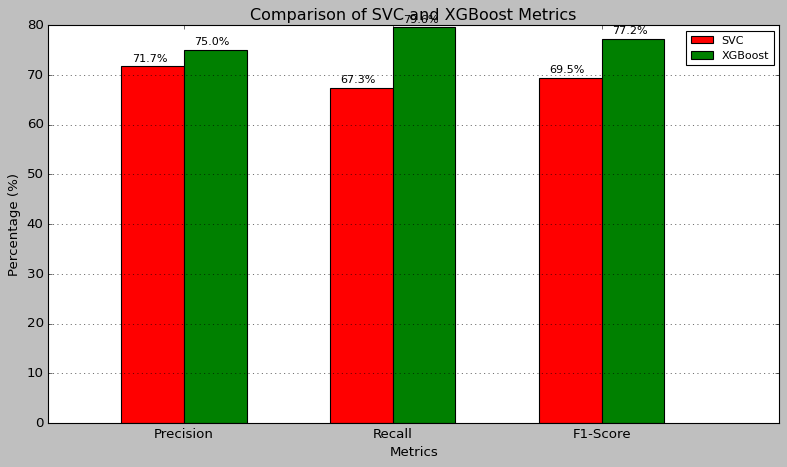

In [ ]:
# Get the classification reports for both models
svc_report = classification_report(y_test, svc_pred, output_dict=True)
xgboost_report = classification_report(y_test, xgboost_pred, output_dict=True)
svc_metrics = [svc_report['1']['precision'] * 100, svc_report['1']['recall'] * 100, svc_report['1']['f1-score'] * 100]
xgboost_metrics = [xgboost_report['1']['precision'] * 100, xgboost_report['1']['recall'] * 100, xgboost_report['1']['f1-score'] * 100]
metrics_labels = ['Precision', 'Recall', 'F1-Score']
bar_width = 0.30
index = np.arange(len(metrics_labels))
fig, ax = plt.subplots(figsize=(10,6))
bar_svc = ax.bar(index, svc_metrics, bar_width, label='SVC', color='red')
bar_xgboost = ax.bar(index + bar_width, xgboost_metrics, bar_width, label='XGBoost', color='green')
ax.set_xlabel('Metrics')
ax.set_ylabel('Percentage (%)')
ax.set_title('Comparison of SVC and XGBoost Metrics')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metrics_labels)
ax.legend(fontsize=10)
for i, v in enumerate(svc_metrics):
    ax.text(i - 0.1, v + 1, f'{v:.1f}%', color='black', fontsize=10)
for i, v in enumerate(xgboost_metrics):
    ax.text(i + bar_width - 0.1, v + 1, f'{v:.1f}%', color='black', fontsize=10)
ax.yaxis.grid(True)
ax.xaxis.grid(False)
plt.xlim([-0.5, len(metrics_labels)])
plt.tight_layout()
plt.show()